## Loading data and preliminary analysis

In [20]:

import re
import random
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)

In [21]:
data=pd.read_csv("data/dataset.csv",nrows=20)
data.columns=['questionID', 'title','Questions','topic','Answers']

In [29]:
# data preprocessing 

for i in range(data.shape[0]):
  data['Answers'][i]=re.sub(r'\n', ' ',data['Answers'][i])
  data['Answers'][i]=re.sub('\(', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r'\)', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r',', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r'-', '',data['Answers'][i])
  data['Answers'][i]=re.sub(r'/', '',data['Answers'][i])  
  data['Answers'][i]=re.sub(r'/', '',data['Answers'][i])


def remove_tags(string):
    result = re.sub('<.*?>','',string)
   
    return result

def letters_only(string):
    result=re.sub("[^a-zA-Z]",  " ", str(string))
    return result


data['Answers']=data['Answers'].apply(lambda cw : remove_tags(cw))
data['Answers']=data['Answers'].apply(lambda cw : letters_only(cw))

data['Questions']=data['Questions'].apply(lambda cw : letters_only(cw))



In [30]:
data.head(10)

,questionID,title,Questions,topic,Answers
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,Family Conflict,What you are describing is something psycholog...
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,I m planning to have baby so I have to quit s...,"Substance Abuse,Addiction",Hi Good for you in planning ahead to do what ...
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,I have secrets in my mind and I don t know wh...,Family Conflict,It sounds like keeping the secrets has become ...
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,"Behavioral Change,Social Relationships",Hi there It s great you are able to realize t...
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,Anxiety,You didn t say what or how many medications yo...
5,556b6940c969ba5861709de4,How do I break an unhealthy relationship pattern?,I want a secure relationship with someone that...,Relationship Dissolution,It is a good thing that you have recognized th...
6,556bec8cc969ba5861709df3,I have anger issues. I am extremely explosive ...,I easily recognize this but have no control ov...,Anger Management,I suggest that you work on emotional awareness...
7,5566f9a2a64752d71ec3ca67,I’ve suffered from insomnia and nightmares for...,It takes me a long time to fall asleep I d es...,Sleep Improvement,First of all exercise is always beneficial for...
8,5570b7fea03de6c365f45ba1,Unethical Therapy Practices,What do you do when a therapist and a parent d...,"Professional Ethics,Legal & Regulatory",I will admit I am confused about this question...
9,556bf606c969ba5861709df8,My friends accusing me of having problems,They re calling me names like hypocrite and a ...,Social Relationships,It sounds like your confused as to why your fr...


In [31]:
pairs=[]

for i in range(data.shape[0]):
  pairs.append(((data['Questions'][i]),data['Answers'][i]))

In [32]:
pairs                                     # questions

[('My wife and mother are having tense disagreements  In the past  they ve had minor differences  For example  my wife would complain to me my mother is too overbearing  my mother would complain my wife is lazy   However  it s intensified lately  I think the cause is my wife talked back to her once  Now  any little disagreement is magnified  leading to major disagreements  What can I do ',
  'What you are describing is something psychologists have termed  triangulation  which is what happens when one family member will not talk to the one they have a problem with and goes to a third member of the family to complain instead  You have been  triangulated  by your wife and mother This is often seen in families  It s seen everywhere  How many times have you had a problem with someone but you didn t go to them to tell them you went to someone else to complain  It is usually difficult for a person to confront another especially in relationships where there is a power differential  For example

## Data preprocessing 

In [33]:
input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()

for line in pairs:

  input_doc, target_doc = line[0], line[1]

  # Appending each input sentence to input_docs
  input_docs.append(input_doc)

  # Splitting words from punctuation  
  target_doc = " ".join(re.findall(r"[\w']+|[^\s\w]", target_doc))

  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'

  target_docs.append(target_doc)

  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split():
    if token not in target_tokens:
      target_tokens.add(token)

input_tokens = sorted(list(input_tokens))  # contains all words of input_docs
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

In [34]:
input_docs

['My wife and mother are having tense disagreements  In the past  they ve had minor differences  For example  my wife would complain to me my mother is too overbearing  my mother would complain my wife is lazy   However  it s intensified lately  I think the cause is my wife talked back to her once  Now  any little disagreement is magnified  leading to major disagreements  What can I do ',
 'I m planning to have baby  so I have to quit smoking   but it s hard  Sometimes it s not a physical need  it s mental     I cannot help myself from thinking about smoking  What can I do to get rid of this addiction ',
 'I have secrets in my mind  and I don t know what to do with them  I don t want to tell my wife and mom because I don t want to hurt them  But I m not sure how long that I can keep the secret to myself     What should I do  It s becoming annoying and making me anxious  Help me out',
 'I am extremely possessive in my relationships and this is hurting my friendships  How can I fix my un

In [35]:
target_docs

['<START> What you are describing is something psychologists have termed triangulation which is what happens when one family member will not talk to the one they have a problem with and goes to a third member of the family to complain instead You have been triangulated by your wife and mother This is often seen in families It s seen everywhere How many times have you had a problem with someone but you didn t go to them to tell them you went to someone else to complain It is usually difficult for a person to confront another especially in relationships where there is a power differential For example I bet it s easier to complain to a coworker about your boss rather than go to the boss with your complaint I m not saying triangulation is always a bad thing Sometimes a third party mediator is needed to help solve problems between two people who disagree That s what therapists do every day Sometimes just getting someone else s perspective can help you see the issue clearer However in your s

In [36]:
input_features_dict = dict([(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict([(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict((i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict((i, token) for token, i in target_features_dict.items())

In [37]:
input_features_dict

{'After': 0,
 'Also': 1,
 'At': 2,
 'But': 3,
 'Cheating': 4,
 'Christian': 5,
 'Every': 6,
 'First': 7,
 'Florida': 8,
 'For': 9,
 'He': 10,
 'Help': 11,
 'How': 12,
 'However': 13,
 'I': 14,
 'If': 15,
 'In': 16,
 'Is': 17,
 'It': 18,
 'Me': 19,
 'Missouri': 20,
 'My': 21,
 'Now': 22,
 'On': 23,
 'Once': 24,
 'P': 25,
 'Please': 26,
 'R': 27,
 'She': 28,
 'So': 29,
 'Sometimes': 30,
 'That': 31,
 'The': 32,
 'Then': 33,
 'They': 34,
 'This': 35,
 'Today': 36,
 'We': 37,
 'What': 38,
 'Without': 39,
 'a': 40,
 'able': 41,
 'about': 42,
 'abuse': 43,
 'accept': 44,
 'accident': 45,
 'accuse': 46,
 'act': 47,
 'acts': 48,
 'actually': 49,
 'addiction': 50,
 'addition': 51,
 'affectionate': 52,
 'after': 53,
 'again': 54,
 'ago': 55,
 'all': 56,
 'alone': 57,
 'along': 58,
 'also': 59,
 'always': 60,
 'am': 61,
 'an': 62,
 'and': 63,
 'anger': 64,
 'annoying': 65,
 'anxiety': 66,
 'anxious': 67,
 'any': 68,
 'anymore': 69,
 'anything': 70,
 'anyway': 71,
 'apologized': 72,
 'are': 73,
 '

## Encoder - Decoder model

In [38]:
max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.
    
    for timestep, token in enumerate(target_doc.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

In [39]:
encoder_input_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [40]:
decoder_target_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Training

In [41]:



from tensorflow import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model  
dimensionality = 256 # Dimensionality 
batch_size = 10   # The batch size and number of epochs
epochs = 500 

#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]

#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

2023-01-25 17:32:02.223935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 17:32:10.121317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs) # Compiling

In [43]:
training_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 510)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 1304)  0           []                               
                                ]                                                                 
                                                                                                  
 lstm (LSTM)                    [(None, 256),        785408      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                 

In [44]:
from keras.utils.vis_utils import plot_model
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)   # plot model

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [45]:
training_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], sample_weight_mode='temporal')#Training
history1=training_model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size = batch_size, epochs = epochs, validation_split = 0.2)
training_model.save('training_model.h5')

Epoch 1/500
2/2 [==============================] - 9s 3s/step - loss: 3.3297 - accuracy: 0.2589 - val_loss: 3.6401 - val_accuracy: 0.0103
Epoch 2/500
2/2 [==============================] - 3s 1s/step - loss: 3.3265 - accuracy: 0.0132 - val_loss: 3.6374 - val_accuracy: 0.0179
Epoch 3/500
2/2 [==============================] - 3s 1s/step - loss: 3.3237 - accuracy: 0.0181 - val_loss: 3.6346 - val_accuracy: 0.0202
Epoch 4/500
2/2 [==============================] - 3s 1s/step - loss: 3.3207 - accuracy: 0.0198 - val_loss: 3.6310 - val_accuracy: 0.0218
Epoch 5/500
2/2 [==============================] - 3s 1s/step - loss: 3.3169 - accuracy: 0.0200 - val_loss: 3.6257 - val_accuracy: 0.0222
Epoch 6/500
2/2 [==============================] - 3s 1s/step - loss: 3.3109 - accuracy: 0.0199 - val_loss: 3.6138 - val_accuracy: 0.0226
Epoch 7/500
2/2 [==============================] - 3s 1s/step - loss: 3.2927 - accuracy: 0.0198 - val_loss: 3.5100 - val_accuracy: 0.0226
Epoch 8/500
2/2 [=================

2/2 [==============================] - 4s 3s/step - loss: 2.8075 - accuracy: 0.0196 - val_loss: 3.1695 - val_accuracy: 0.0242
Epoch 61/500
2/2 [==============================] - 3s 1s/step - loss: 2.8084 - accuracy: 0.0188 - val_loss: 3.1681 - val_accuracy: 0.0242
Epoch 62/500
2/2 [==============================] - 3s 1s/step - loss: 2.8024 - accuracy: 0.0195 - val_loss: 3.1723 - val_accuracy: 0.0226
Epoch 63/500
2/2 [==============================] - 3s 2s/step - loss: 2.8104 - accuracy: 0.0198 - val_loss: 3.1690 - val_accuracy: 0.0242
Epoch 64/500
2/2 [==============================] - 4s 2s/step - loss: 2.8065 - accuracy: 0.0183 - val_loss: 3.1731 - val_accuracy: 0.0238
Epoch 65/500
2/2 [==============================] - 3s 1s/step - loss: 2.8121 - accuracy: 0.0190 - val_loss: 3.1612 - val_accuracy: 0.0226
Epoch 66/500
2/2 [==============================] - 3s 1s/step - loss: 2.7981 - accuracy: 0.0201 - val_loss: 3.1721 - val_accuracy: 0.0226
Epoch 67/500
2/2 [======================

Epoch 119/500
2/2 [==============================] - 3s 2s/step - loss: 2.7884 - accuracy: 0.0218 - val_loss: 3.1614 - val_accuracy: 0.0226
Epoch 120/500
2/2 [==============================] - 3s 2s/step - loss: 2.7868 - accuracy: 0.0211 - val_loss: 3.1583 - val_accuracy: 0.0226
Epoch 121/500
2/2 [==============================] - 3s 2s/step - loss: 2.7936 - accuracy: 0.0198 - val_loss: 3.1576 - val_accuracy: 0.0222
Epoch 122/500
2/2 [==============================] - 3s 2s/step - loss: 2.7886 - accuracy: 0.0217 - val_loss: 3.1558 - val_accuracy: 0.0222
Epoch 123/500
2/2 [==============================] - 3s 1s/step - loss: 2.7810 - accuracy: 0.0188 - val_loss: 3.1632 - val_accuracy: 0.0246
Epoch 124/500
2/2 [==============================] - 3s 1s/step - loss: 2.7930 - accuracy: 0.0215 - val_loss: 3.1522 - val_accuracy: 0.0222
Epoch 125/500
2/2 [==============================] - 3s 1s/step - loss: 2.7782 - accuracy: 0.0215 - val_loss: 3.1572 - val_accuracy: 0.0230
Epoch 126/500
2/2 [=

2/2 [==============================] - 3s 2s/step - loss: 2.7679 - accuracy: 0.0213 - val_loss: 3.1629 - val_accuracy: 0.0246
Epoch 178/500
2/2 [==============================] - 3s 2s/step - loss: 2.7713 - accuracy: 0.0191 - val_loss: 3.1671 - val_accuracy: 0.0230
Epoch 179/500
2/2 [==============================] - 3s 2s/step - loss: 2.7659 - accuracy: 0.0212 - val_loss: 3.1675 - val_accuracy: 0.0222
Epoch 180/500
2/2 [==============================] - 3s 2s/step - loss: 2.7797 - accuracy: 0.0215 - val_loss: 3.1649 - val_accuracy: 0.0230
Epoch 181/500
2/2 [==============================] - 3s 2s/step - loss: 2.7695 - accuracy: 0.0212 - val_loss: 3.1629 - val_accuracy: 0.0238
Epoch 182/500
2/2 [==============================] - 3s 2s/step - loss: 2.7632 - accuracy: 0.0211 - val_loss: 3.1706 - val_accuracy: 0.0218
Epoch 183/500
2/2 [==============================] - 3s 2s/step - loss: 2.7792 - accuracy: 0.0218 - val_loss: 3.1626 - val_accuracy: 0.0242
Epoch 184/500
2/2 [===============

2/2 [==============================] - 3s 2s/step - loss: 2.7675 - accuracy: 0.0213 - val_loss: 3.1600 - val_accuracy: 0.0238
Epoch 236/500
2/2 [==============================] - 3s 2s/step - loss: 2.7499 - accuracy: 0.0218 - val_loss: 3.1589 - val_accuracy: 0.0246
Epoch 237/500
2/2 [==============================] - 3s 2s/step - loss: 2.7442 - accuracy: 0.0218 - val_loss: 3.1686 - val_accuracy: 0.0222
Epoch 238/500
2/2 [==============================] - 3s 2s/step - loss: 2.7507 - accuracy: 0.0217 - val_loss: 3.1653 - val_accuracy: 0.0238
Epoch 239/500
2/2 [==============================] - 3s 2s/step - loss: 2.7446 - accuracy: 0.0214 - val_loss: 3.1820 - val_accuracy: 0.0234
Epoch 240/500
2/2 [==============================] - 3s 2s/step - loss: 2.7783 - accuracy: 0.0201 - val_loss: 3.1651 - val_accuracy: 0.0230
Epoch 241/500
2/2 [==============================] - 3s 2s/step - loss: 2.7525 - accuracy: 0.0213 - val_loss: 3.1644 - val_accuracy: 0.0234
Epoch 242/500
2/2 [===============

2/2 [==============================] - 3s 2s/step - loss: 2.7399 - accuracy: 0.0216 - val_loss: 3.1689 - val_accuracy: 0.0230
Epoch 294/500
2/2 [==============================] - 3s 1s/step - loss: 2.7338 - accuracy: 0.0211 - val_loss: 3.1730 - val_accuracy: 0.0238
Epoch 295/500
2/2 [==============================] - 3s 1s/step - loss: 2.7297 - accuracy: 0.0214 - val_loss: 3.1908 - val_accuracy: 0.0226
Epoch 296/500
2/2 [==============================] - 3s 1s/step - loss: 2.7857 - accuracy: 0.0199 - val_loss: 3.1722 - val_accuracy: 0.0218
Epoch 297/500
2/2 [==============================] - 3s 2s/step - loss: 2.7511 - accuracy: 0.0218 - val_loss: 3.1723 - val_accuracy: 0.0234
Epoch 298/500
2/2 [==============================] - 4s 2s/step - loss: 2.7455 - accuracy: 0.0211 - val_loss: 3.1774 - val_accuracy: 0.0242
Epoch 299/500
2/2 [==============================] - 4s 2s/step - loss: 2.7436 - accuracy: 0.0216 - val_loss: 3.1698 - val_accuracy: 0.0238
Epoch 300/500
2/2 [===============

2/2 [==============================] - 3s 2s/step - loss: 2.7250 - accuracy: 0.0217 - val_loss: 3.1798 - val_accuracy: 0.0238
Epoch 352/500
2/2 [==============================] - 3s 1s/step - loss: 2.7205 - accuracy: 0.0218 - val_loss: 3.1874 - val_accuracy: 0.0246
Epoch 353/500
2/2 [==============================] - 3s 1s/step - loss: 2.7261 - accuracy: 0.0217 - val_loss: 3.1803 - val_accuracy: 0.0238
Epoch 354/500
2/2 [==============================] - 3s 1s/step - loss: 2.7319 - accuracy: 0.0207 - val_loss: 3.1821 - val_accuracy: 0.0250
Epoch 355/500
2/2 [==============================] - 3s 2s/step - loss: 2.7232 - accuracy: 0.0220 - val_loss: 3.1831 - val_accuracy: 0.0218
Epoch 356/500
2/2 [==============================] - 3s 2s/step - loss: 2.7477 - accuracy: 0.0216 - val_loss: 3.1771 - val_accuracy: 0.0242
Epoch 357/500
2/2 [==============================] - 3s 1s/step - loss: 2.7189 - accuracy: 0.0218 - val_loss: 3.1782 - val_accuracy: 0.0238
Epoch 358/500
2/2 [===============

2/2 [==============================] - 3s 2s/step - loss: 2.7245 - accuracy: 0.0211 - val_loss: 3.1886 - val_accuracy: 0.0222
Epoch 410/500
2/2 [==============================] - 3s 2s/step - loss: 2.7206 - accuracy: 0.0206 - val_loss: 3.1818 - val_accuracy: 0.0234
Epoch 411/500
2/2 [==============================] - 3s 2s/step - loss: 2.7271 - accuracy: 0.0214 - val_loss: 3.1861 - val_accuracy: 0.0262
Epoch 412/500
2/2 [==============================] - 3s 2s/step - loss: 2.7221 - accuracy: 0.0218 - val_loss: 3.1919 - val_accuracy: 0.0246
Epoch 413/500
2/2 [==============================] - 3s 2s/step - loss: 2.7209 - accuracy: 0.0226 - val_loss: 3.1875 - val_accuracy: 0.0230
Epoch 414/500
2/2 [==============================] - 3s 2s/step - loss: 2.7088 - accuracy: 0.0215 - val_loss: 3.1939 - val_accuracy: 0.0222
Epoch 415/500
2/2 [==============================] - 3s 2s/step - loss: 2.7388 - accuracy: 0.0215 - val_loss: 3.1893 - val_accuracy: 0.0242
Epoch 416/500
2/2 [===============

2/2 [==============================] - 4s 2s/step - loss: 2.7103 - accuracy: 0.0221 - val_loss: 3.1986 - val_accuracy: 0.0230
Epoch 468/500
2/2 [==============================] - 3s 2s/step - loss: 2.7098 - accuracy: 0.0216 - val_loss: 3.2033 - val_accuracy: 0.0246
Epoch 469/500
2/2 [==============================] - 3s 2s/step - loss: 2.7144 - accuracy: 0.0225 - val_loss: 3.2023 - val_accuracy: 0.0230
Epoch 470/500
2/2 [==============================] - 3s 2s/step - loss: 2.7075 - accuracy: 0.0211 - val_loss: 3.2108 - val_accuracy: 0.0222
Epoch 471/500
2/2 [==============================] - 3s 2s/step - loss: 2.7582 - accuracy: 0.0217 - val_loss: 3.2005 - val_accuracy: 0.0246
Epoch 472/500
2/2 [==============================] - 3s 2s/step - loss: 2.7202 - accuracy: 0.0223 - val_loss: 3.2043 - val_accuracy: 0.0246
Epoch 473/500
2/2 [==============================] - 3s 2s/step - loss: 2.7153 - accuracy: 0.0218 - val_loss: 3.1976 - val_accuracy: 0.0246
Epoch 474/500
2/2 [===============

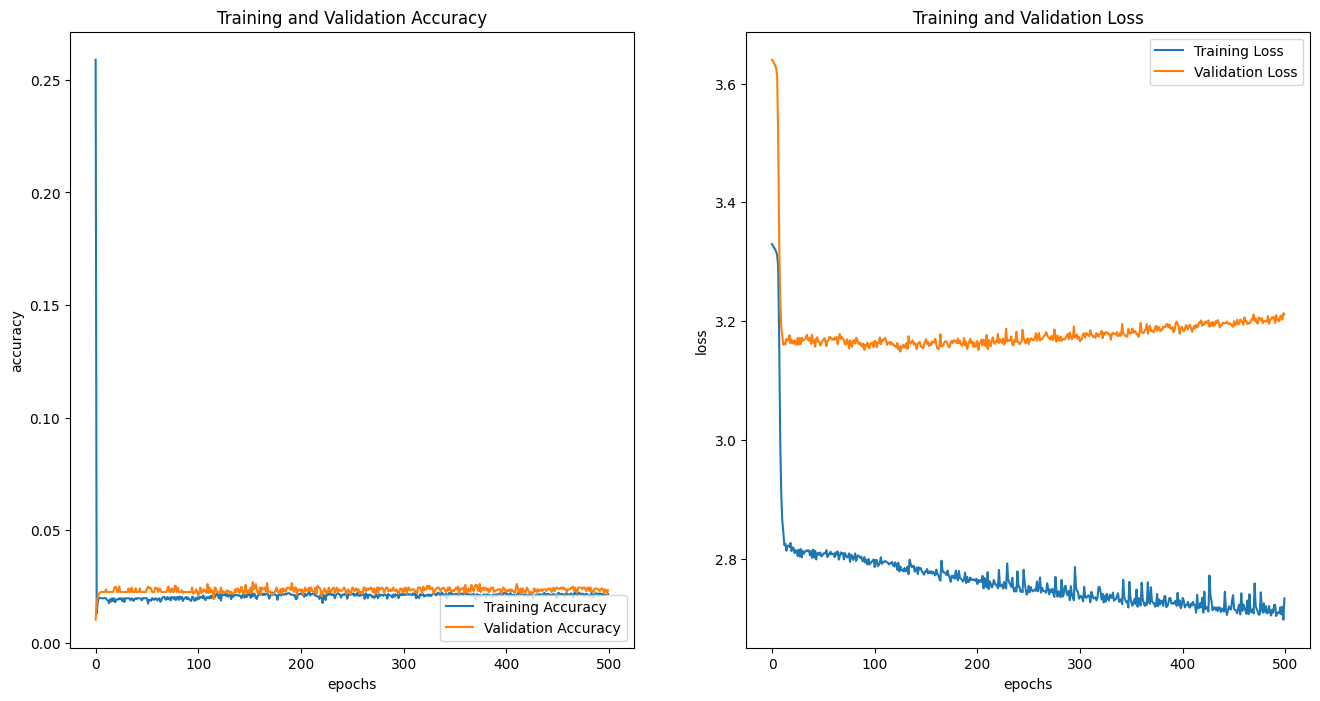

In [46]:

import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions

In [47]:
from keras.models import load_model
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

In [48]:
latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]

In [49]:
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)

In [50]:
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [51]:
from keras.models import load_model
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    
    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.
    
    #A variable to store our response word by word
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
          #Predicting output tokens with probabilities and states
          output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)
          
          #Choosing the one with highest probability
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_token = reverse_target_features_dict[sampled_token_index]
          decoded_sentence += " " + sampled_token
          
          #Stop if hit max length or found the stop token
          if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
          
          #Update the target sequence
          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.
          
          #Update states
          states_value = [hidden_state, cell_state]
    return decoded_sentence

In [52]:
class ChatBot:
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
  
  #Method to start the conversation
  def start_chat(self):
    user_response = input("Hi, I'm a chatbot trained on random dialogs. AMA!\n")
    
    if user_response in self.negative_responses:
      print("Ok, have a great day!")
      return
    self.chat(user_response)
  
  #Method to handle the conversation
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")
    
  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
  
  #Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False
  
chatbot = ChatBot()

## Demo

In [53]:
chatbot.start_chat()

Hi, I'm a chatbot trained on random dialogs. AMA!
I am extremely possessive in my relationships
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step
 It It sounds you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to
work pressure
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step
 It It sounds you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to
I am extremely possessive in my relationships and this is hurting my friendships. How can I fix my underlying issues?
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step
 It It sounds you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to
hi
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step
 It It sounds you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to
It It sounds you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you you to to to to to to to to to to to to to to to to to you you you you you you you you you you you you 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


KeyboardInterrupt: Interrupted by user